<h1>Fourier series of a periodic function</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes',grid=True)
plt.rc('grid',lw=0.5)
plt.rc('lines',markersize=10)

<h2>Calculation from the function</h2>

In [2]:
def fft_1(f,p,n):
    
  # f periodic function
  # p period
  # n number of Fourier harmonics
  # n = m/2+1  
  
  m = 2*n-2
  ts = np.linspace(0,p,m,endpoint=False)
  ws = 2*np.pi*m/p*np.fft.rfftfreq(m)

  return np.fft.rfft(f(ts))/m,ws

<h3>Example 1</h3>

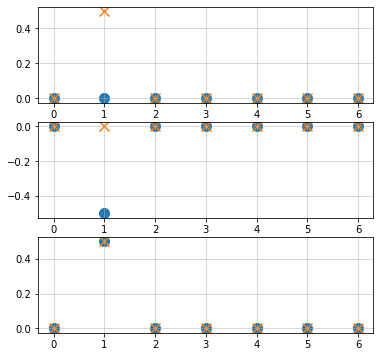

In [3]:
sin = fft_1(np.sin,2*np.pi,7)
cos = fft_1(np.cos,2*np.pi,7)
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(sin[1],sin[0].real)
plt.scatter(cos[1],cos[0].real,marker='x')
plt.subplot(312)
plt.scatter(sin[1],sin[0].imag)
plt.scatter(cos[1],cos[0].imag,marker='x')
plt.subplot(313)
plt.scatter(sin[1],np.abs(sin[0]))
plt.scatter(cos[1],np.abs(cos[0]),marker='x')

<h3>Example 1 bis</h3>

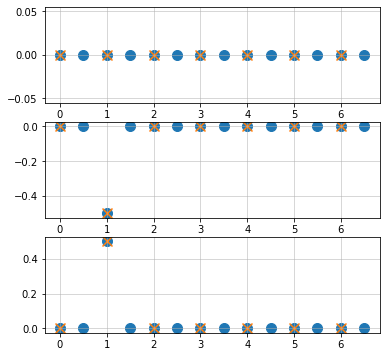

In [4]:
ex1 = fft_1(np.sin,4*np.pi,14)
ex2 = fft_1(np.sin,2*np.pi,7)
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex1[1],ex1[0].real.round(10))
plt.scatter(ex2[1],ex2[0].real.round(10),marker='x')
plt.subplot(312)
plt.scatter(ex1[1],ex1[0].imag)
plt.scatter(ex2[1],ex2[0].imag,marker='x')
plt.subplot(313)
plt.scatter(ex1[1],np.abs(ex1[0]))
plt.scatter(ex2[1],np.abs(ex2[0]),marker='x')

<h3>Example 1 tris</h3>

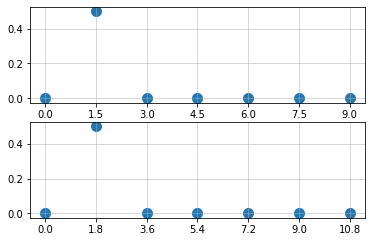

In [5]:
plt.figure(figsize=(6,6))
ex1 = fft_1(lambda x: np.sin(1.5*x),2*np.pi/1.5,7)
ex2 = fft_1(lambda x: np.sin(1.8*x),2*np.pi/1.8,7)
plt.subplot(311)
plt.scatter(ex1[1],np.abs(ex1[0]))
p = 2*np.pi/1.5; plt.xticks(2*np.pi/p*np.arange(0,7,1));
plt.subplot(312)
plt.scatter(ex2[1],np.abs(ex2[0]))
p = 2*np.pi/1.8; plt.xticks(2*np.pi/p*np.arange(0,7,1));

<h3>Example 2</h3>

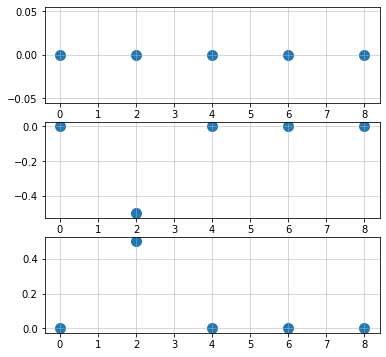

In [6]:
sin = fft_1(lambda x: np.sin(2*x),np.pi,5)
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(sin[1],sin[0].real.round(10))
plt.subplot(312)
plt.scatter(sin[1],sin[0].imag)
plt.subplot(313)
plt.scatter(sin[1],np.abs(sin[0]))

<h3>Example 3: translate and change period</h3>

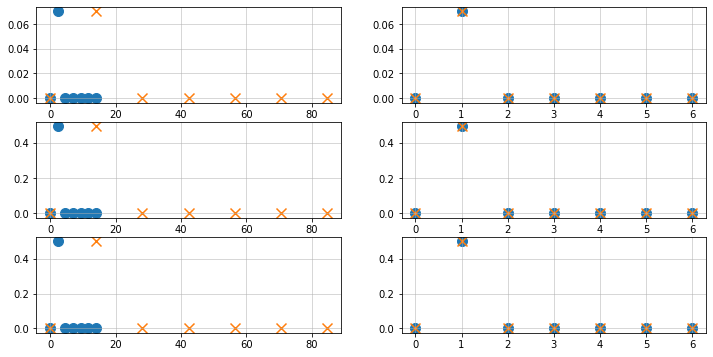

In [7]:
w = 2.32; ex1 = fft_1(lambda x: np.sin(w*x+3),2*np.pi/w,7)
w = 14.1; ex2 = fft_1(lambda x: np.sin(w*x+3),2*np.pi/w,7)
plt.figure(figsize=(12,6))
plt.subplot(321)
plt.scatter(ex1[1],ex1[0].real)
plt.scatter(ex2[1],ex2[0].real,marker='x')
plt.subplot(323)
plt.scatter(ex1[1],ex1[0].imag)
plt.scatter(ex2[1],ex2[0].imag,marker='x')
plt.subplot(325)
plt.scatter(ex1[1],np.abs(ex1[0]))
plt.scatter(ex2[1],np.abs(ex2[0]),marker='x')
plt.subplot(322)
plt.scatter(range(7),ex1[0].real)
plt.scatter(range(7),ex2[0].real,marker='x')
plt.subplot(324)
plt.scatter(range(7),ex1[0].imag)
plt.scatter(range(7),ex2[0].imag,marker='x')
plt.subplot(326)
plt.scatter(range(7),np.abs(ex1[0]))
plt.scatter(range(7),np.abs(ex2[0]),marker='x')

<h3>Example 4</h3>

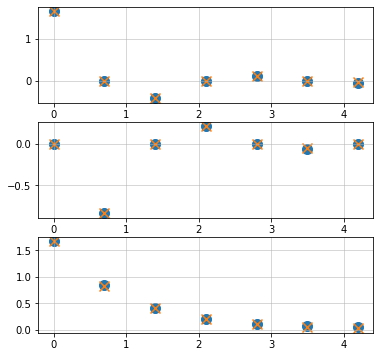

In [8]:
w,a = 0.7,0.8
ex = fft_1(lambda x: 1/(1-a*np.sin(x*w)),2*np.pi/w,7)
g = lambda x: ((1-np.sqrt(1-a**2))/(1j*a))**np.abs(x)/np.sqrt(1-a**2)
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(range(7)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1],ex[0].imag)
plt.scatter(ex[1],g(range(7)).imag,marker='x')
plt.subplot(313)
plt.scatter(ex[1],np.abs(ex[0]))
plt.scatter(ex[1],np.abs(g(range(7))),marker='x')

<h3>Example 5</h3>

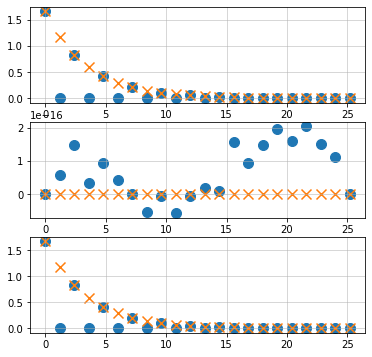

In [9]:
n = 22
w,a = 1.2,0.8
ex = fft_1(lambda x: 1/(1-a*np.cos(2*x*w)),2*np.pi/w,n)
z1 = 1/a*(1-np.sqrt(1-a**2))
g = lambda x: z1**np.abs(0.5*x)/np.sqrt(1-a**2)
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(np.arange(n)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1],ex[0].imag)
plt.scatter(ex[1],g(np.arange(n)).imag,marker='x')
plt.subplot(313)
plt.scatter(ex[1],np.abs(ex[0]))
plt.scatter(ex[1],np.abs(g(np.arange(n))),marker='x')

<h3>Example 6</h3>

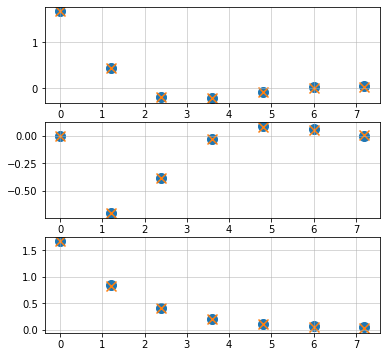

In [10]:
w,a = 1.2,0.8
phi = 1
ex = fft_1(lambda x: 1/(1-a*np.cos(x*w-phi)),2*np.pi/w,7)
z1 = 1/a*(1-np.sqrt(1-a**2))
g = lambda x: z1**np.abs(x)/np.sqrt(1-a**2)*np.exp(-1j*np.array(x)*phi)
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(range(7)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1],ex[0].imag)
plt.scatter(ex[1],g(range(7)).imag,marker='x')
plt.subplot(313)
plt.scatter(ex[1],np.abs(ex[0]))
plt.scatter(ex[1],np.abs(g(range(7))),marker='x')

<h3>Example 7</h3>

<h4>Not enough points</h4>

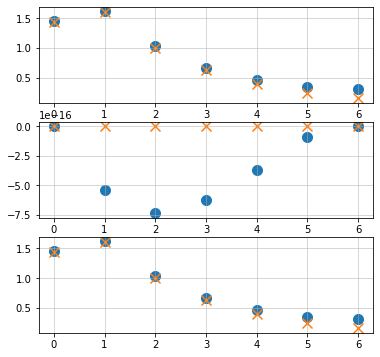

In [11]:
n = 7
w,a = 1,0.9
f = lambda x: np.cos(x*w)/(1-a*np.cos(x*w))
ex = fft_1(f,2*np.pi/w,n)
z1 = 1/a*(1-np.sqrt(1-a**2))
g = lambda x: 0.5/np.sqrt(1-a**2)*(z1**np.abs(x-1)+z1**np.abs(x+1))
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(np.arange(n)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1],ex[0].imag)
plt.scatter(ex[1],g(np.arange(n)).imag,marker='x')
plt.subplot(313)
plt.scatter(ex[1],np.abs(ex[0]))
plt.scatter(ex[1],np.abs(g(np.arange(n))),marker='x')

<h4>Adding points</h4>

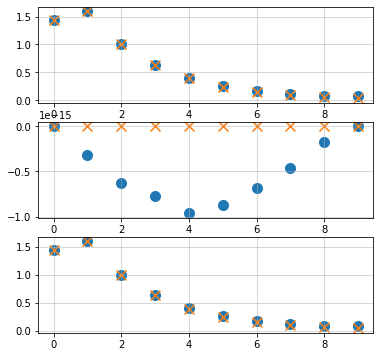

In [12]:
n = 10
w,a = 1,0.9
f = lambda x: np.cos(x*w)/(1-a*np.cos(x*w))
ex = fft_1(f,2*np.pi/w,n)
z1 = 1/a*(1-np.sqrt(1-a**2))
g = lambda x: 0.5/np.sqrt(1-a**2)*(z1**np.abs(x-1)+z1**np.abs(x+1))
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(np.arange(n)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1],ex[0].imag)
plt.scatter(ex[1],g(np.arange(n)).imag,marker='x')
plt.subplot(313)
plt.scatter(ex[1],np.abs(ex[0]))
plt.scatter(ex[1],np.abs(g(np.arange(n))),marker='x')

<h3>Example 8</h3>

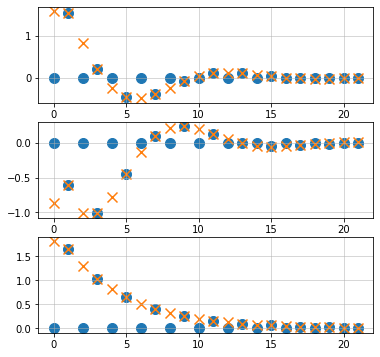

In [13]:
n = 22
w,a = 1,0.9
phi = 1
f = lambda x: np.cos(x*w)/(1-a*np.cos(2*x*w-phi))
ex = fft_1(f,2*np.pi/w,n)
z1 = 1/a*(1-np.sqrt(1-a**2))*np.exp(-1j*phi)
g = lambda x: 0.5/np.sqrt(1-a**2)*(z1**np.abs(0.5*(x-1))
                                  +z1**np.abs(0.5*(x+1)))

plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(np.arange(n)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1],ex[0].imag)
plt.scatter(ex[1],g(np.arange(n)).imag,marker='x')
plt.subplot(313)
plt.scatter(ex[1],np.abs(ex[0]))
plt.scatter(ex[1],np.abs(g(np.arange(n))),marker='x')

<h3>Example 9</h3>

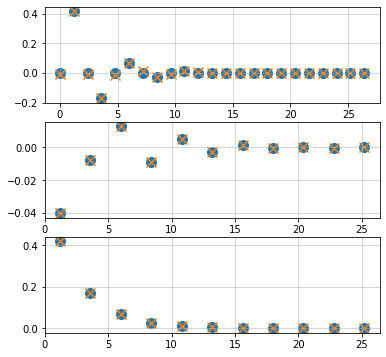

In [14]:
n = 23
w,a = 1.2,0.7
phi = 3
f = lambda x: np.cos(x*w)/(1-a*np.cos(2*x*w-phi))
ex = fft_1(f,2*np.pi/w,n)
b = 1/a
z = (b-np.sqrt(b**2-1))*np.exp(-1j*phi)

g = lambda x: (z+1)*b/(2*np.sqrt(b**2-1)) * z**np.abs(0.5*(x-1))
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.scatter(ex[1],ex[0].real)
plt.scatter(ex[1],g(np.arange(n)).real,marker='x')
plt.subplot(312)
plt.scatter(ex[1][1::2],ex[0].imag[1::2])
plt.scatter(ex[1][1::2],g(np.arange(n)).imag[1::2],marker='x')
plt.subplot(313)
plt.scatter(ex[1][1::2],np.abs(ex[0])[1::2])
plt.scatter(ex[1][1::2],np.abs(g(np.arange(n)))[1::2],marker='x')